# LEAD SCORING CASE STUDY

### Problem Statement

To create a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

#### Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn import linear_model
import statsmodels.api as sm
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

#### Loading Data

In [2]:
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##### Exploring data 

In [3]:
print("The no. of columns present in the dataset :  ", len(lead_data.columns))
print("The no. of rows present in the dataset :  ", len(lead_data))

The no. of columns present in the dataset :   37
The no. of rows present in the dataset :   9240


In [3]:
lead_data.info()

NameError: name 'lead_data' is not defined

In [5]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### EDA 

#### Cleaning data

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.


So, Converting 'Select' values to NaN.

In [6]:
lead_data = lead_data.replace('Select', np.nan)

Counting Unique values for every column.

In [7]:
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

Dropping Unique value columns, since they won't be of any use.

In [8]:
lead_data= lead_data.drop(['Magazine',
                           'Receive More Updates About Our Courses',                           
                           'Update me on Supply Chain Content',
                           'Get updates on DM Content',
                           'I agree to pay the amount through cheque'],
                          axis=1)

#### Data Shape after dropping Unique Value Columns

In [9]:
print("The no. of columns present in the dataset :  ", len(lead_data.columns))
print("The no. of rows present in the dataset :  ", len(lead_data))

The no. of columns present in the dataset :   32
The no. of rows present in the dataset :   9240


Checking Null values

In [10]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

Checking Null values percentage 

In [11]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

##### Dropping columns which are having more than 70% NA values.

In [12]:
lead_data = lead_data.drop(lead_data.loc[:,list(round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)>70)].columns, 1)

#### Data Shape after dropping Columns  having more than 70% NA values.

In [13]:
print("The no. of columns present in the dataset :  ", len(lead_data.columns))
print("The no. of rows present in the dataset :  ", len(lead_data))

The no. of columns present in the dataset :   30
The no. of rows present in the dataset :   9240


Checking Unique values for column "Lead Number" and "Prospect ID"

In [14]:
lead_data['Lead Number'].nunique() 

9240

In [15]:
lead_data['Prospect ID'].nunique() 

9240

Since all the values are unique in columns 'Prospect ID' & 'Lead Number', we can drop one of them. 

##### Hence droppimg Prospect ID 


In [16]:
lead_data.drop('Prospect ID', axis = 1, inplace=True)

Checking Asymetrique Columns:

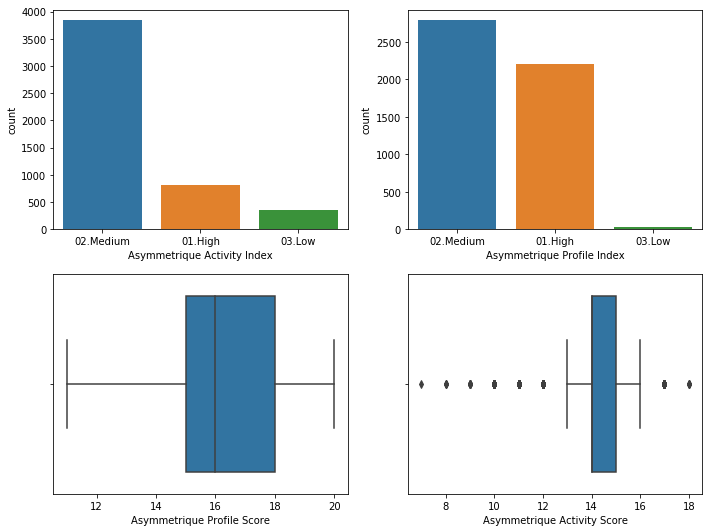

In [17]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(lead_data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.countplot(lead_data['Asymmetrique Profile Index'], ax = axs[0,1])
plt3 = sns.boxplot(lead_data['Asymmetrique Profile Score'], ax = axs[1,0])
plt4 = sns.boxplot(lead_data['Asymmetrique Activity Score'], ax = axs[1,1])

plt.tight_layout()

There is too much variation in thes parameters so its not reliable to impute any value in it. 

###### Hence we can drop these columns

In [18]:
lead_data = lead_data.drop(['Asymmetrique Activity Index',
                  'Asymmetrique Profile Index',
                  'Asymmetrique Profile Score',
                  'Asymmetrique Activity Score'],1)

###### Data Shape after dropping Asymmetrique Columns.

In [19]:
print("The no. of columns present in the dataset :  ", len(lead_data.columns))
print("The no. of rows present in the dataset :  ", len(lead_data))

The no. of columns present in the dataset :   25
The no. of rows present in the dataset :   9240


Analysing City Column

In [20]:
lead_data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

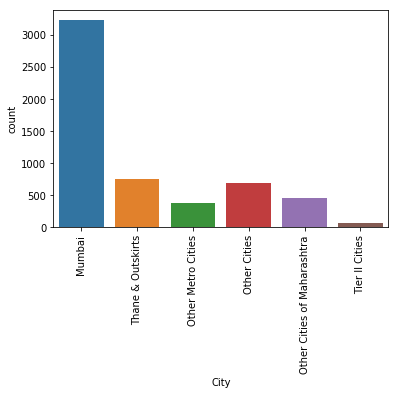

In [21]:
sns.countplot(lead_data.City)
xticks(rotation = 90)

Analysing Country Column

In [22]:
lead_data.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

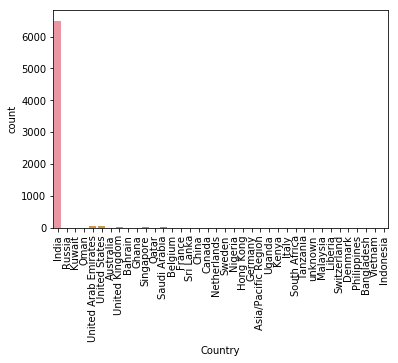

In [23]:
sns.countplot(lead_data.Country)
xticks(rotation = 90)

Analysing City & Country Column together where country is not India.

In [24]:
lead_data[(lead_data['Country'] != 'India') & ~(lead_data['Country'].isnull())][['Country', 'City']]

,Country,City
14,Russia,NaN
87,Kuwait,Mumbai
103,Oman,Mumbai
207,United Arab Emirates,NaN
243,United States,Mumbai
274,Australia,NaN
293,United States,NaN
312,United Kingdom,NaN
356,Bahrain,Other Cities
410,Ghana,NaN


#### Inference:

It can be noted that the column "Country" and "City" are not in sync and City contain more than 30% null values.

Hence both of the columns can be dropped out. 


In [25]:
lead_data.drop(['City', 'Country'], axis = 1, inplace = True)

Data shape after dropping columns  City and country 

In [26]:
print("The no. of columns present in the dataset :  ", len(lead_data.columns))
print("The no. of rows present in the dataset :  ", len(lead_data))

The no. of columns present in the dataset :   23
The no. of rows present in the dataset :   9240


Analysing the column "Lead Quality"

In [27]:
lead_data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

In [28]:
print(lead_data['Lead Quality'].unique())

['Low in Relevance' nan 'Might be' 'Not Sure' 'Worst' 'High in Relevance']


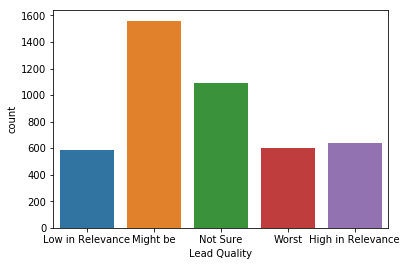

In [29]:
sns.countplot(lead_data['Lead Quality'])

As the column "Lead quality" is purely based on the intution of employee, so we can impute 'Not Sure' in NaN.

In [30]:
lead_data['Lead Quality'] = lead_data['Lead Quality'].replace(np.nan, 'Not Sure')

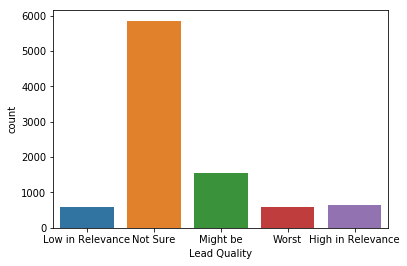

In [31]:
sns.countplot(lead_data['Lead Quality'])

Analysing Specialization variable

In [32]:
lead_data['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

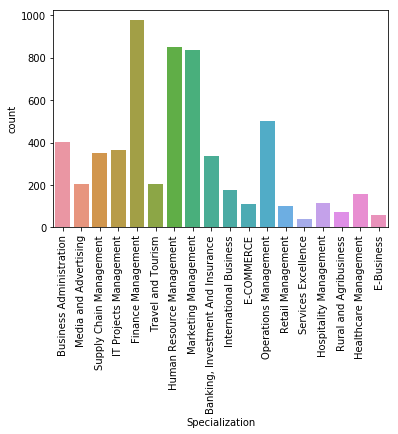

In [33]:
sns.countplot(lead_data['Specialization'])
xticks(rotation = 90)

Inference : 
    
If the options is not available for the lead that is his/her specialization, they might leave it blank.
He/She might be student.

Hence, we can make a category "Others" for missing values. 

In [34]:
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

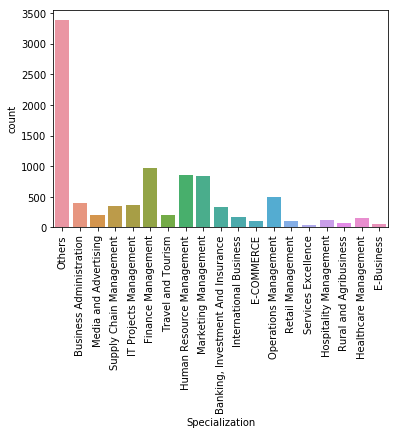

In [35]:
sns.countplot(lead_data['Specialization'])
xticks(rotation = 90)

Analysing the column "tags"

In [36]:
lead_data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

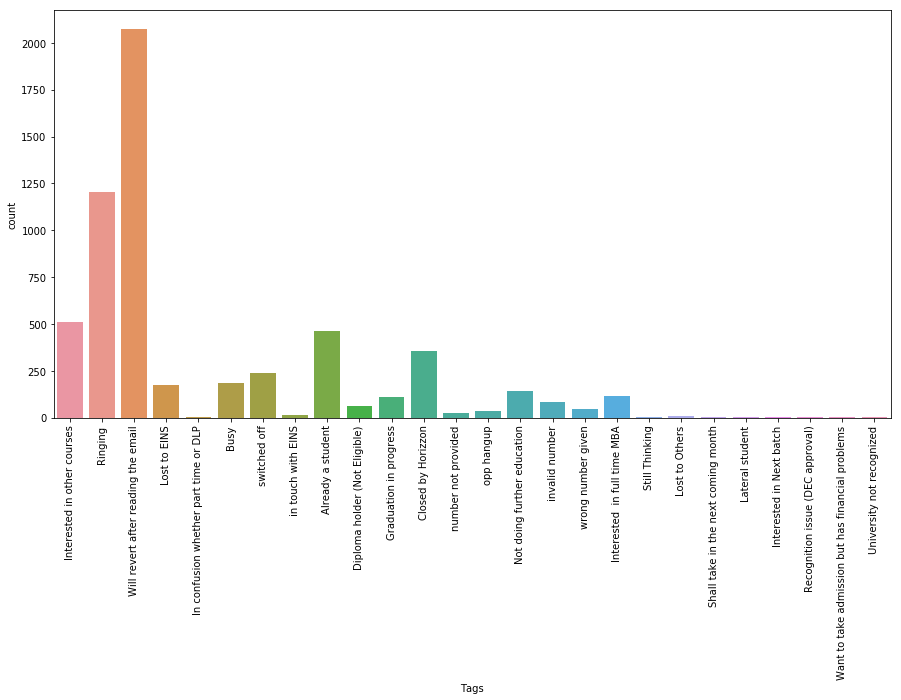

In [37]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(lead_data.Tags)
xticks(rotation = 90)

NaN in tag column may be imputed by 'Will revert after reading the email'. Since it's maximum.

In [38]:
lead_data['Tags'] = lead_data['Tags'].replace(np.nan, 'Will revert after reading the email')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

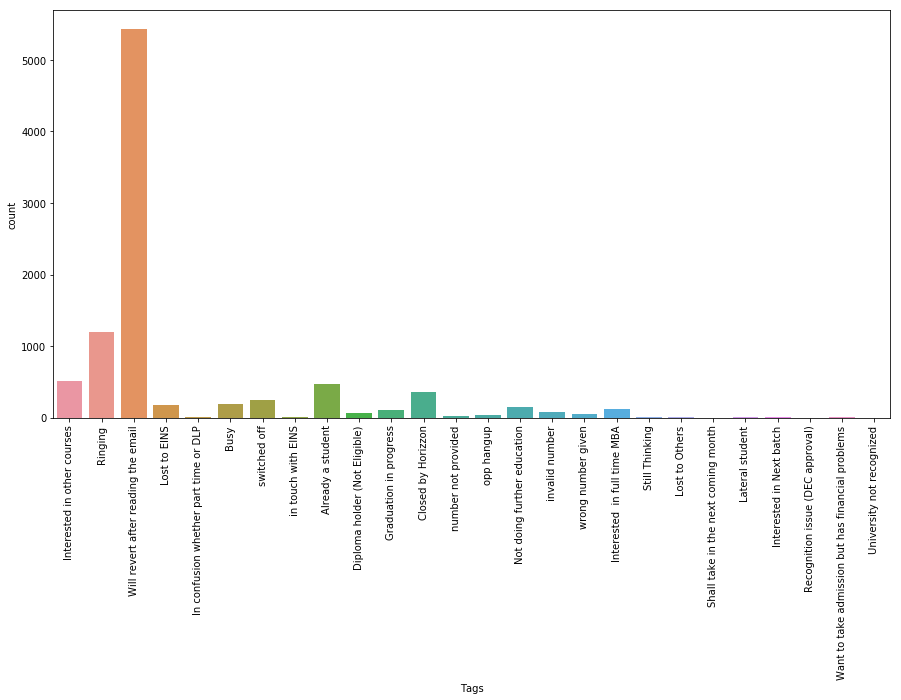

In [39]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(lead_data.Tags)
xticks(rotation = 90)

Analysing "What matters most to you in choosing a course" variable

In [40]:
lead_data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [41]:
print(lead_data['What matters most to you in choosing a course'].unique())

['Better Career Prospects' nan 'Flexibility & Convenience' 'Other']


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

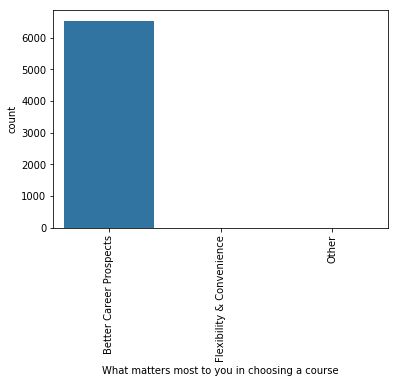

In [42]:
sns.countplot(lead_data['What matters most to you in choosing a course'])
xticks(rotation = 90)

NaN may be imputed by 'Better Career Prospects'

In [43]:
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [44]:
print(lead_data['What matters most to you in choosing a course'].unique())

['Better Career Prospects' 'Flexibility & Convenience' 'Other']


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

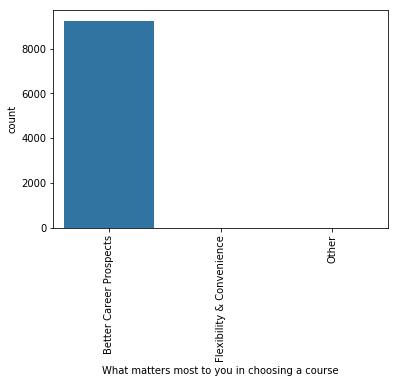

In [45]:
sns.countplot(lead_data['What matters most to you in choosing a course'])
xticks(rotation = 90)

Analysing "What is your current occupation" variable

In [46]:
lead_data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [47]:
print(lead_data['What is your current occupation'].unique())

['Unemployed' 'Student' nan 'Working Professional' 'Businessman' 'Other'
 'Housewife']


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

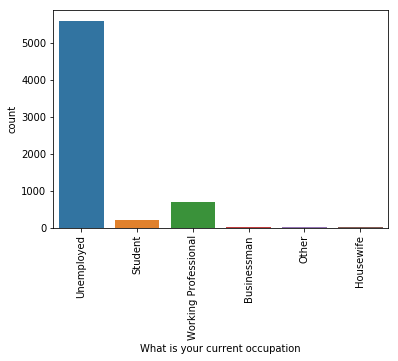

In [48]:
sns.countplot(lead_data['What is your current occupation'])
xticks(rotation = 90)

In [49]:
# NaN can be imputed as "Unemployed" in it.
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Unemployed')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

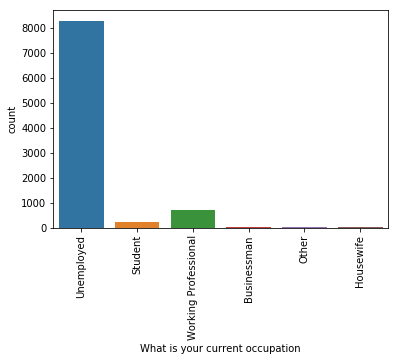

In [50]:
sns.countplot(lead_data['What is your current occupation'])
xticks(rotation = 90)

Analysing "Lead Source" variable

In [51]:
lead_data['Lead Source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [52]:
print(lead_data['Lead Source'].unique())

['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

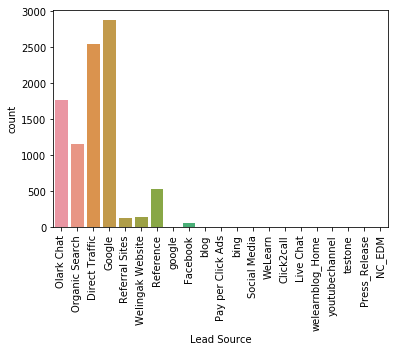

In [53]:
sns.countplot(lead_data['Lead Source'])
xticks(rotation = 90)

In [54]:
lead_data.isnull().sum()

Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                              0
Through Recommendations                       

###### Checking Null Values after dropping the features which were not required

In [55]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

###### Dropping NA rows

In [56]:
lead_data.dropna(inplace = True)

###### Checking Null Values after dropping NA rows

In [57]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

###### Checking shape of data, after cleaning

In [58]:
print("The no. of columns present in the dataset :  ", len(lead_data.columns))
print("The no. of rows present in the dataset :  ", len(lead_data))

The no. of columns present in the dataset :   23
The no. of rows present in the dataset :   9074


#### Analysing independent variable with the dependent variable

### Dependent Variable : Converted 
    
Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

In [59]:
lead_data['Converted'].unique()

array([0, 1], dtype=int64)

In [60]:
sum(lead_data['Converted'])/len(lead_data['Converted'].index)*100

37.85541106458012

### 1. Lead Origin v/s Converted

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

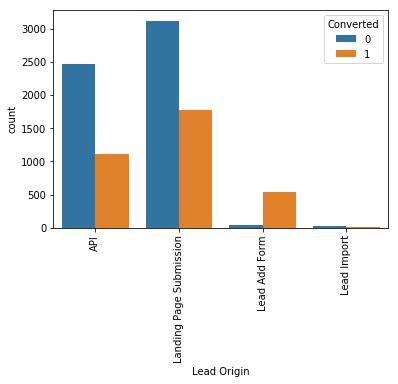

In [61]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data)
xticks(rotation = 90)

In [62]:
# Inspecting the variations

lead_data['Lead Origin'].value_counts()/len(lead_data)*100,2

(Landing Page Submission    53.835133
 API                        39.431342
 Lead Add Form               6.402909
 Lead Import                 0.330615
 Name: Lead Origin, dtype: float64, 2)

## Inference 1 (Lead Origin v/s Converted) 
1. Landing Page Submission & API have higher conversion rate but count of lead originated from them are considerable.

2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.

3. Lead Import are very less in count.

#### Action Plan:

1. To improvve lead converion of API and Landing Page Submission.
2. To generate more leads from Lead Add Form.

### 2. Lead Source v/s Converted 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

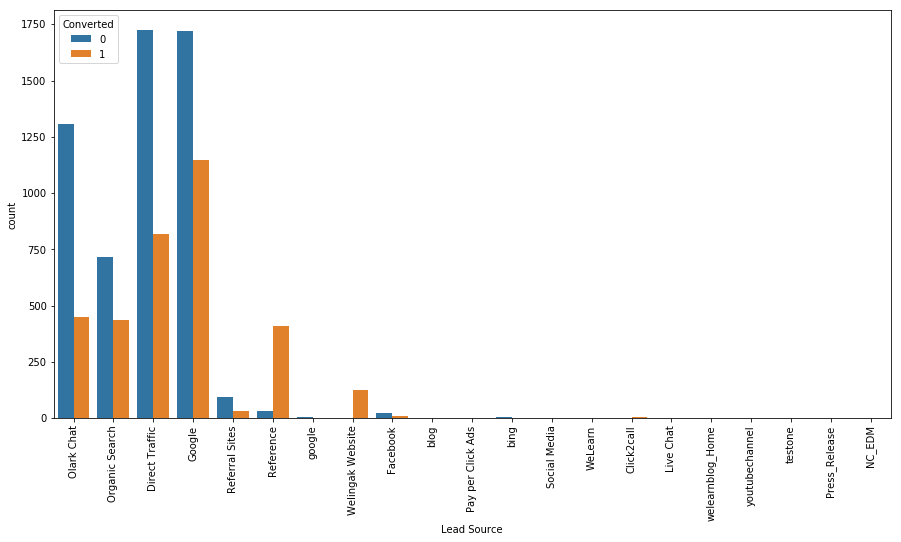

In [63]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
xticks(rotation = 90)

In [64]:
lead_data['Lead Source'].value_counts()/len(lead_data)*100,2

(Google               31.606789
 Direct Traffic       28.025127
 Olark Chat           19.318933
 Organic Search       12.717655
 Reference             4.882081
 Welingak Website      1.421644
 Referral Sites        1.377562
 Facebook              0.341635
 bing                  0.066123
 google                0.055102
 Click2call            0.044082
 Social Media          0.022041
 Press_Release         0.022041
 Live Chat             0.022041
 Pay per Click Ads     0.011020
 youtubechannel        0.011020
 WeLearn               0.011020
 welearnblog_Home      0.011020
 testone               0.011020
 NC_EDM                0.011020
 blog                  0.011020
 Name: Lead Source, dtype: float64, 2)

Since many of the values are present in negligible percentage, so it makes sense to combine them and create a new variable for them as "Others".

In [65]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['bing', 'Click2call', 'Live Chat','Social Media','Press_Release' , 'WeLearn',
                                                'Pay per Click Ads', 'welearnblog_Home', 'blog','NC_EDM', 'youtubechannel',
                                                'testone' ], 'Others')

In [66]:
lead_data['Lead Source'].value_counts()/len(lead_data)*100,2

(Google              31.661891
 Direct Traffic      28.025127
 Olark Chat          19.318933
 Organic Search      12.717655
 Reference            4.882081
 Welingak Website     1.421644
 Referral Sites       1.377562
 Facebook             0.341635
 Others               0.253471
 Name: Lead Source, dtype: float64, 2)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

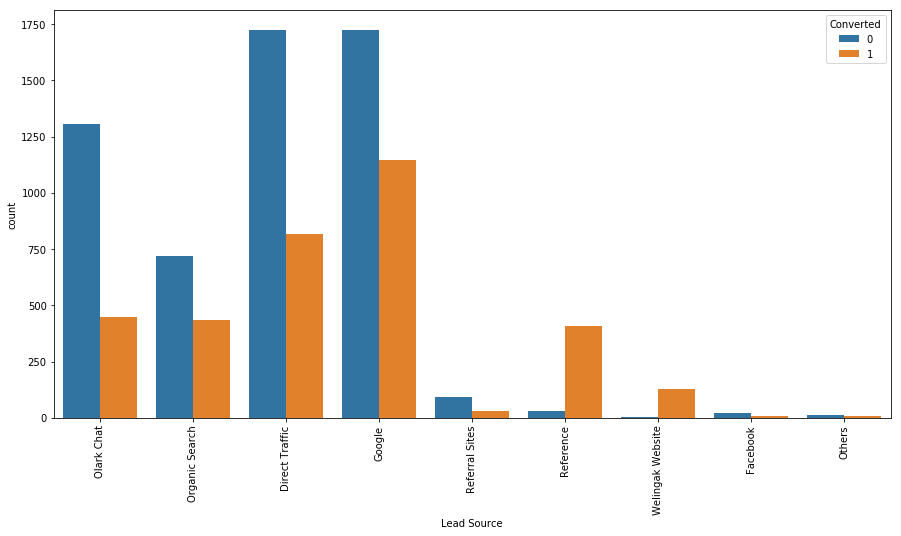

In [67]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
xticks(rotation = 90)

## Inference (Lead Source v/s Converted ):

1. Google and Direct traffic generates maximum number of leads.

2. Conversion Rate of reference leads and leads through welingak website is high.

#### Action Plan:

1. Improve lead converion of "Olark Chat", "Organic Search", "Direct Traffic", "Google", & "Referral Sites".

2. Generate more leads from "Reference" and "Welingak Website"

### Do Not Email v/s Converted

In [68]:
lead_data['Do Not Email'].value_counts()/len(lead_data)*100,2

(No     92.109323
 Yes     7.890677
 Name: Do Not Email, dtype: float64, 2)

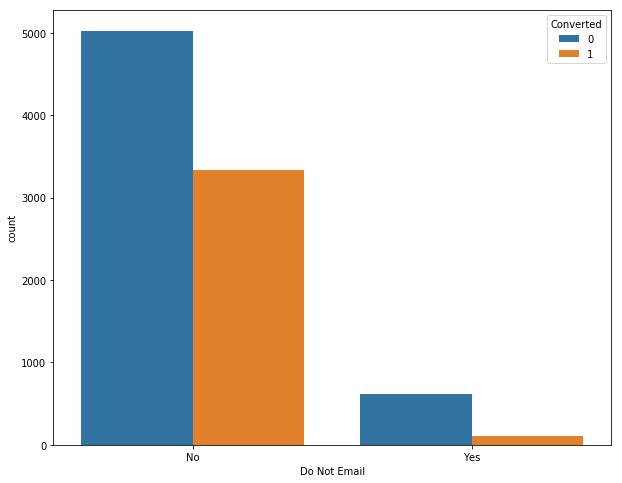

In [69]:
fig, axs = plt.subplots(figsize = (10,8))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data)

Since there is not much variation for the column, it makes sense to drop it.

In [70]:
lead_data.drop(['Do Not Email'], axis = 1, inplace = True)

### Do Not Call v/s Converted 

In [71]:
lead_data['Do Not Call'].value_counts()/len(lead_data)*100,2

(No     99.977959
 Yes     0.022041
 Name: Do Not Call, dtype: float64, 2)

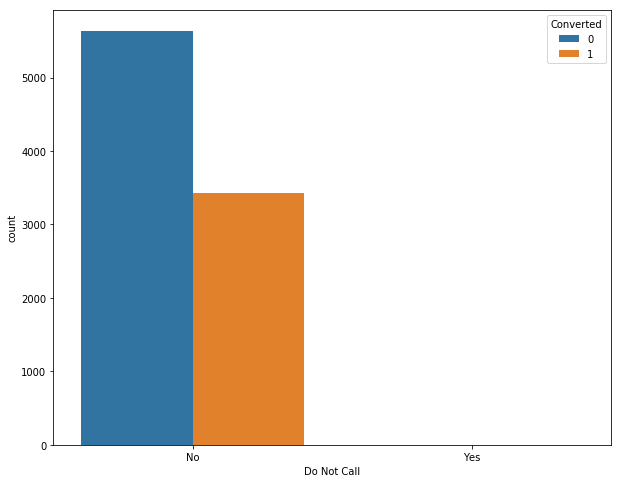

In [72]:
fig, axs = plt.subplots(figsize = (10,8))
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data)

Since there is not much variation for the column, it makes sense to drop it.

In [73]:
lead_data.drop(['Do Not Call'], axis = 1, inplace = True)

### Search v/s Converted

In [74]:
lead_data['Search'].value_counts()/len(lead_data)*100,2

(No     99.845713
 Yes     0.154287
 Name: Search, dtype: float64, 2)

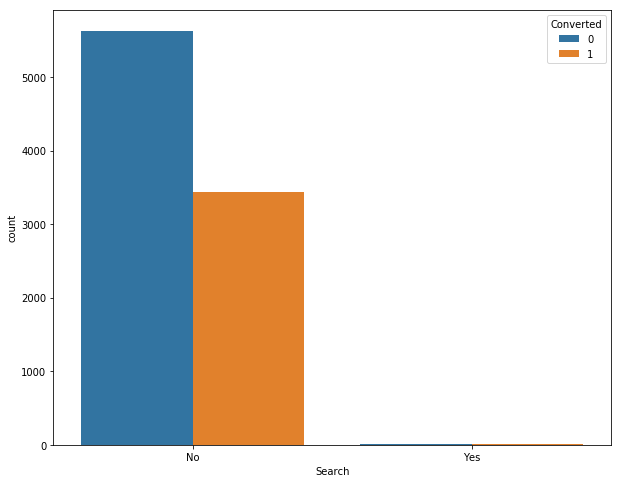

In [75]:
fig, axs = plt.subplots(figsize = (10,8))
sns.countplot(x = "Search", hue = "Converted", data = lead_data)

Since there is not much variation for the column, it makes sense to drop it.

In [76]:
lead_data.drop(['Search'], axis = 1, inplace = True)

### Newspaper Article v/s Converted

In [77]:
lead_data['Newspaper Article'].value_counts()/len(lead_data)*100,2

(No     99.977959
 Yes     0.022041
 Name: Newspaper Article, dtype: float64, 2)

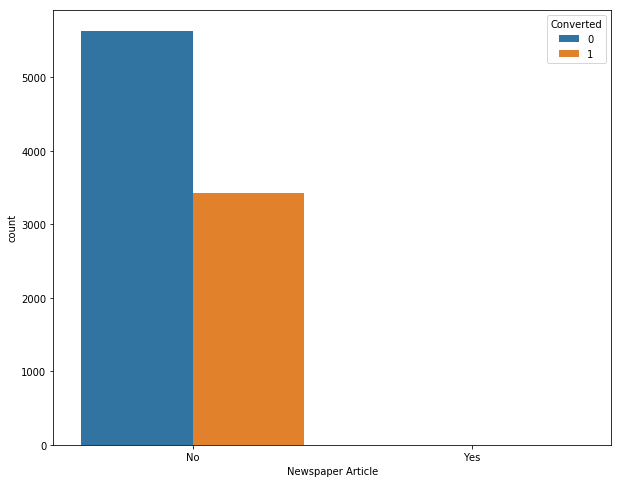

In [78]:
fig, axs = plt.subplots(figsize = (10,8))
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data)

Since there is not much variation for the column, it makes sense to drop it.

In [79]:
lead_data.drop(['Newspaper Article'], axis = 1, inplace = True)

### X Education Forums v/s Converted

In [80]:
lead_data['X Education Forums'].value_counts()/len(lead_data)*100,2

(No     99.98898
 Yes     0.01102
 Name: X Education Forums, dtype: float64, 2)

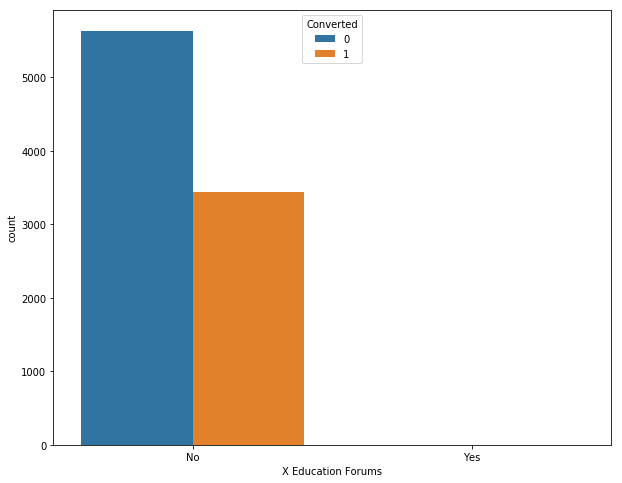

In [81]:
fig, axs = plt.subplots(figsize = (10,8))
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data)

Since there is not much variation for the column, it makes sense to drop it.

In [82]:
lead_data.drop(['X Education Forums'], axis = 1, inplace = True)

### Newspaper v/s Converted

In [83]:
lead_data['Newspaper'].value_counts()/len(lead_data)*100,2

(No     99.98898
 Yes     0.01102
 Name: Newspaper, dtype: float64, 2)

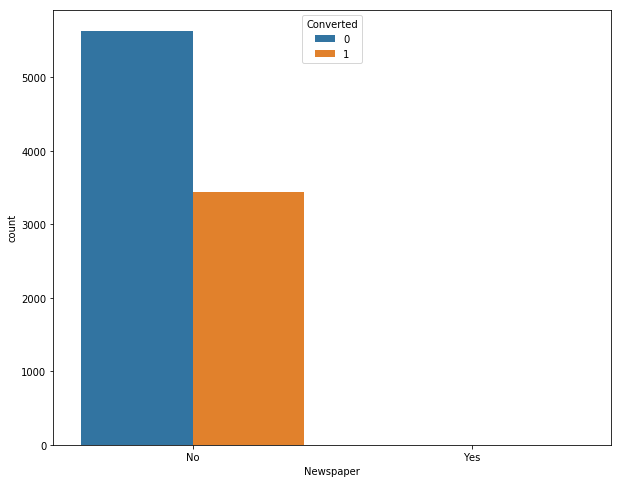

In [84]:
fig, axs = plt.subplots(figsize = (10,8))
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data)

Since there is not much variation for the column, it makes sense to drop it.

In [85]:
lead_data.drop(['Newspaper'], axis = 1, inplace = True)

### Digital Advertisement v/s Converted

In [86]:
lead_data['Digital Advertisement'].value_counts()/len(lead_data)*100,2

(No     99.955918
 Yes     0.044082
 Name: Digital Advertisement, dtype: float64, 2)

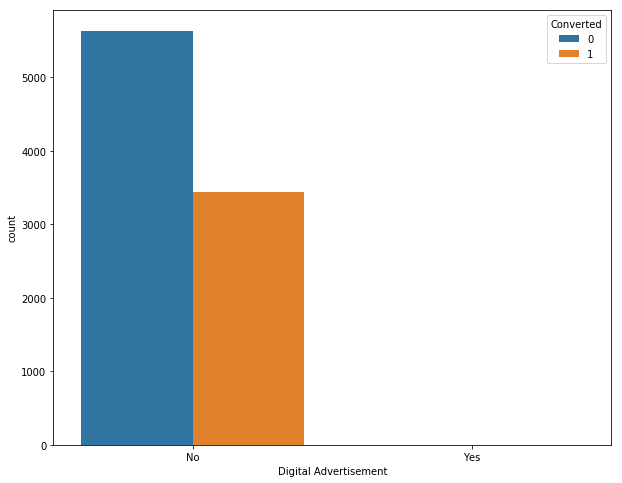

In [87]:
fig, axs = plt.subplots(figsize = (10,8))
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data)

Since there is not much variation for the column, it makes sense to drop it.

In [88]:
lead_data.drop(['Digital Advertisement'], axis = 1, inplace = True)

### Through Recommendations v/s Converted

In [89]:
lead_data['Through Recommendations'].value_counts()/len(lead_data)*100,2

(No     99.922857
 Yes     0.077143
 Name: Through Recommendations, dtype: float64, 2)

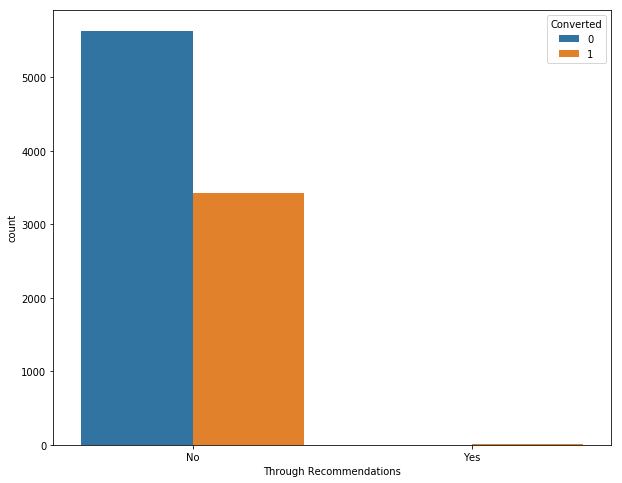

In [90]:
fig, axs = plt.subplots(figsize = (10,8))
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data)

Since there is not much variation for the column, it makes sense to drop it.

In [91]:
lead_data.drop(['Through Recommendations'], axis = 1, inplace = True)

### What matters most to you in choosing a course v/s Converted

In [92]:
lead_data['What matters most to you in choosing a course'].value_counts()/len(lead_data)*100,2

(Better Career Prospects      99.977959
 Flexibility & Convenience     0.011020
 Other                         0.011020
 Name: What matters most to you in choosing a course, dtype: float64, 2)

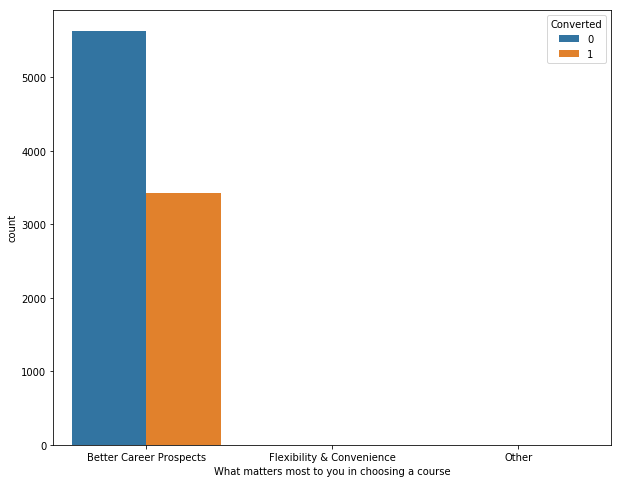

In [93]:
fig, axs = plt.subplots(figsize = (10,8))
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lead_data)

Since there is not much variation for the column, it makes sense to drop it.

In [94]:
lead_data.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

### A free copy of Mastering The Interview v/s Converted

In [95]:
lead_data['A free copy of Mastering The Interview'].value_counts()/len(lead_data)*100,2

(No     68.172801
 Yes    31.827199
 Name: A free copy of Mastering The Interview, dtype: float64, 2)

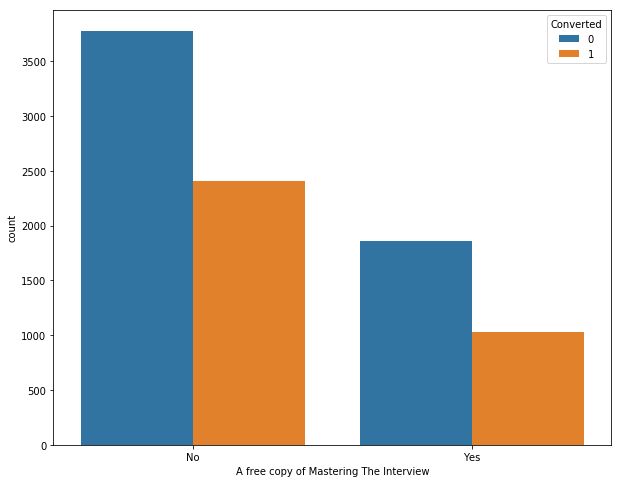

In [96]:
fig, axs = plt.subplots(figsize = (10,8))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data)

This variable doesn't makles sense at all. So it's better to drop it.

In [97]:
lead_data.drop(['A free copy of Mastering The Interview'], axis = 1, inplace = True)

### Total Visits

In [98]:
lead_data['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

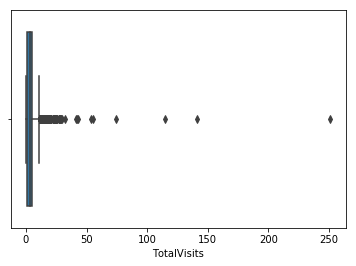

In [99]:
sns.boxplot(lead_data['TotalVisits'])

##### As we can see there are a number of outliers in the data. W will cap the outliers to 95% value for analysis.

In [100]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

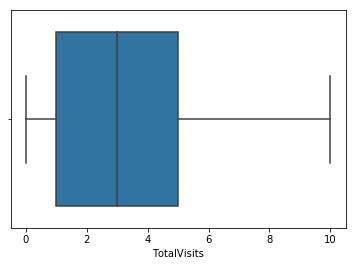

In [101]:
sns.boxplot(lead_data['TotalVisits'])

### Total Visits v/s Converted

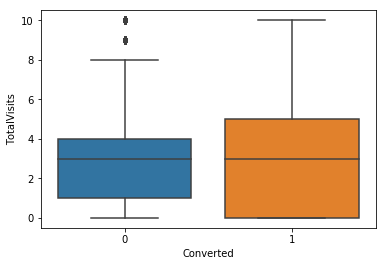

In [102]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)

### Inference (Total Visits v/s Converted)

1. Median for converted and not converted leads are the same.

2. Nothng conclusive can be said on the basis of Total Visits.

### Last Activity v/s Converted

In [103]:
lead_data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

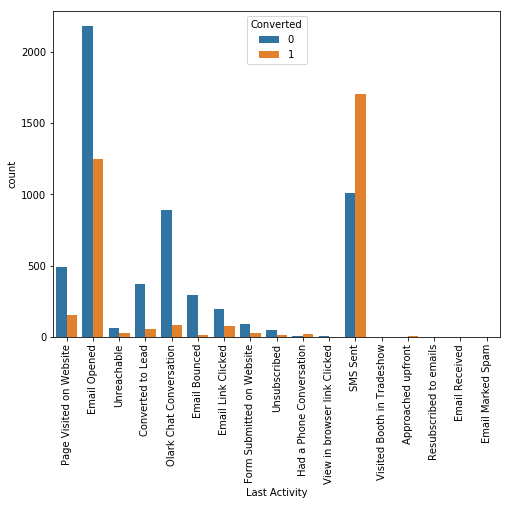

In [104]:
fig, axs = plt.subplots(figsize = (8,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
xticks(rotation = 90)

In [105]:
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation',
                                                                 'View in browser link Clicked',
                                                                 'Visited Booth in Tradeshow', 
                                                                 'Approached upfront',
                                                                 'Resubscribed to emails',
                                                                 'Email Received', 
                                                                 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

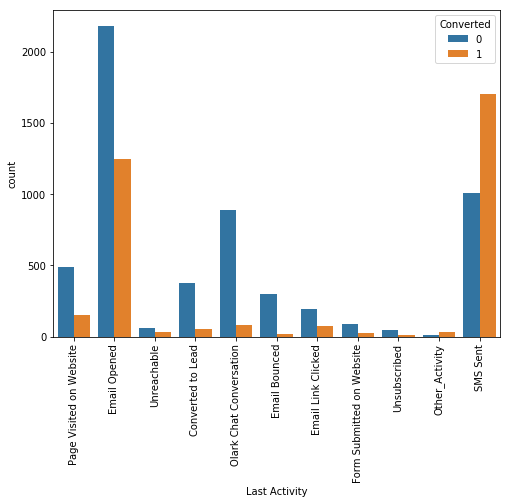

In [106]:
fig, axs = plt.subplots(figsize = (8,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
xticks(rotation = 90)

### Inference (Last Activity v/s Converted)

1. Conversion rate for SMS Sent is highest

#### Action Plan: 

2. Need to focus on Email opened as it is their most last activity.

### Specialization v/s Converted

In [107]:
lead_data.Specialization.describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

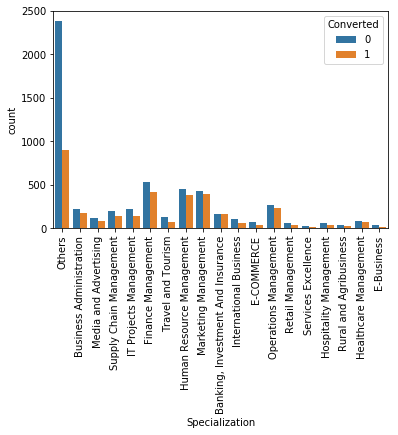

In [108]:
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data)
xticks(rotation = 90)

### What is your current occupation v/s Converted

In [109]:
lead_data['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [110]:
lead_data['What is your current occupation'].value_counts()/len(lead_data)*100,2

(Unemployed              89.916244
 Working Professional     7.460877
 Student                  2.270223
 Other                    0.165307
 Housewife                0.099184
 Businessman              0.088164
 Name: What is your current occupation, dtype: float64, 2)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

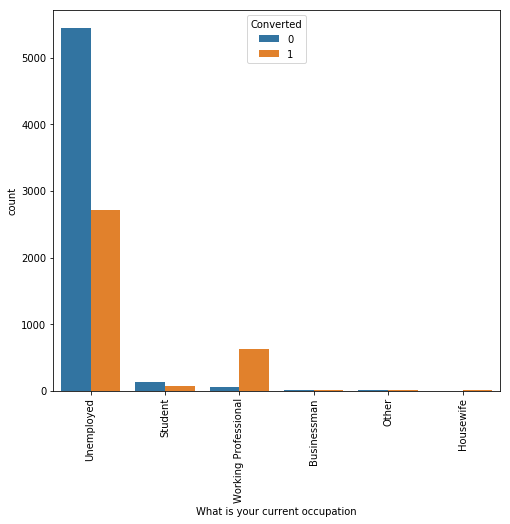

In [111]:
fig, axs = plt.subplots(figsize = (8,7))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data)
xticks(rotation = 90)

## Inference (What is your current occupation v/s Converted)

1. "Unemployed" has more leads but less conversion rate.

2. "Working Professionals" have more conversion rate than no of leads.

### Action Plan:

1. Need to generate more leads from Working Professional w

2. To improve lead converion of Unemployed

### Total Time Spent on Website v/s Converted

In [112]:
lead_data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

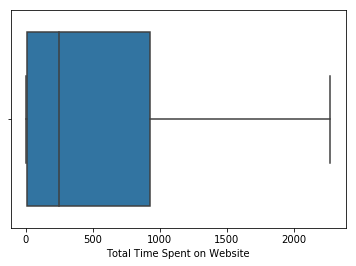

In [113]:
sns.boxplot(lead_data['Total Time Spent on Website'])

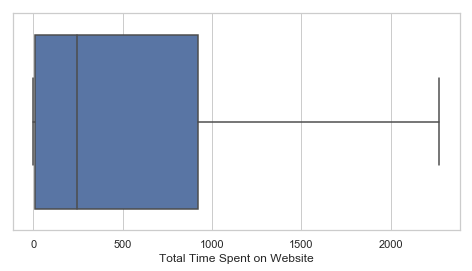

In [114]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(8, 4))
sns.boxplot(lead_data['Total Time Spent on Website'])

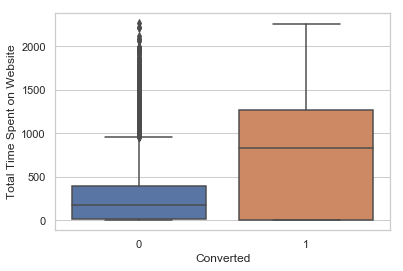

In [115]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data)

## Inference (Total Time Spent on Website v/s Converted)

1. Leads spending more time on the weblsite are more likely to be converted.


### Action Plan :

2. Website should be made more engaging to make leads spend more time.

### Tags v/s Converted

In [116]:
lead_data['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

In [117]:
lead_data['Tags'].value_counts()/len(lead_data)*100,2

(Will revert after reading the email                  58.882521
 Ringing                                              13.081331
 Interested in other courses                           5.609434
 Already a student                                     5.124532
 Closed by Horizzon                                    3.317170
 switched off                                          2.644920
 Busy                                                  2.038792
 Lost to EINS                                          1.895526
 Not doing further education                           1.597972
 Interested  in full time MBA                          1.278378
 Graduation in progress                                1.223275
 invalid number                                        0.914701
 Diploma holder (Not Eligible)                         0.694291
 wrong number given                                    0.517963
 opp hangup                                            0.363676
 number not provided                    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

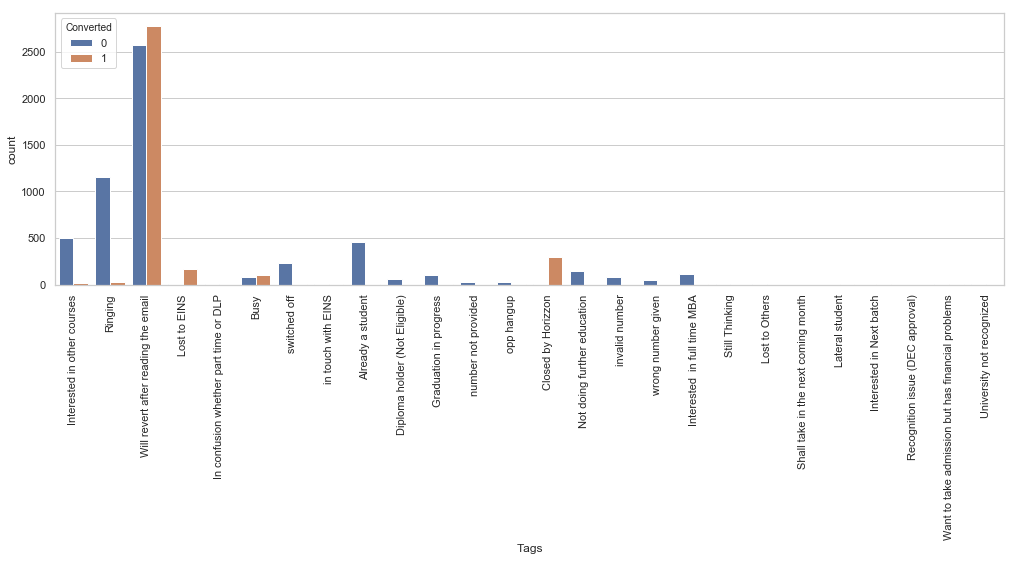

In [118]:
fig, axs = plt.subplots(figsize = (17,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data)
xticks(rotation = 90)

In [119]:
lead_data['Tags'] = lead_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Others')

In [120]:
lead_data['Tags'].value_counts()/len(lead_data)*100,2

(Will revert after reading the email    58.882521
 Ringing                                13.081331
 Interested in other courses             5.609434
 Already a student                       5.124532
 Closed by Horizzon                      3.317170
 Others                                  3.096760
 switched off                            2.644920
 Busy                                    2.038792
 Lost to EINS                            1.895526
 Not doing further education             1.597972
 Interested  in full time MBA            1.278378
 invalid number                          0.914701
 wrong number given                      0.517963
 Name: Tags, dtype: float64, 2)

In [121]:
lead_data['Tags'].describe()

count                                    9074
unique                                     13
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

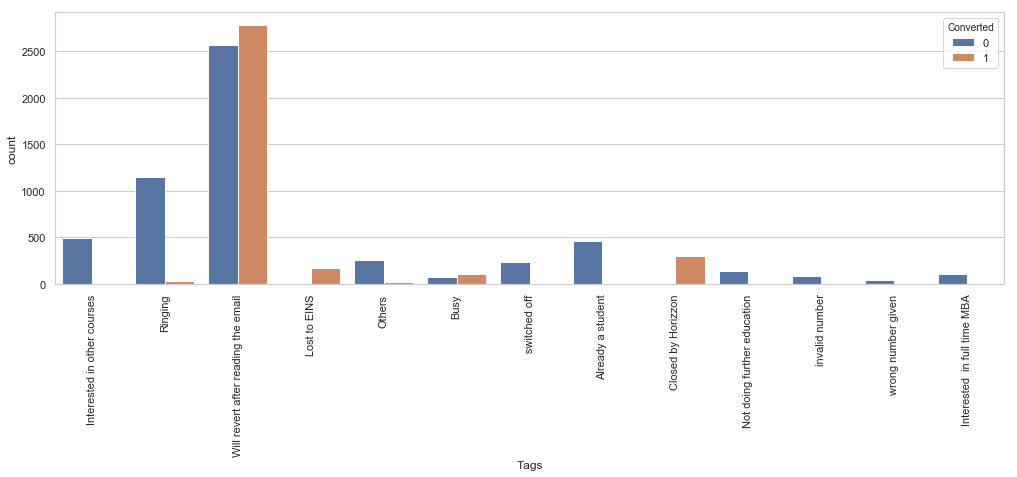

In [122]:
fig, axs = plt.subplots(figsize = (17,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data)
xticks(rotation = 90)

### Lead Quality v/s Converted

In [123]:
lead_data['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

In [124]:
lead_data['Lead Quality'].value_counts()/len(lead_data)*100,2

(Not Sure             63.985012
 Might be             16.740137
 Worst                 6.623319
 High in Relevance     6.524135
 Low in Relevance      6.127397
 Name: Lead Quality, dtype: float64, 2)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

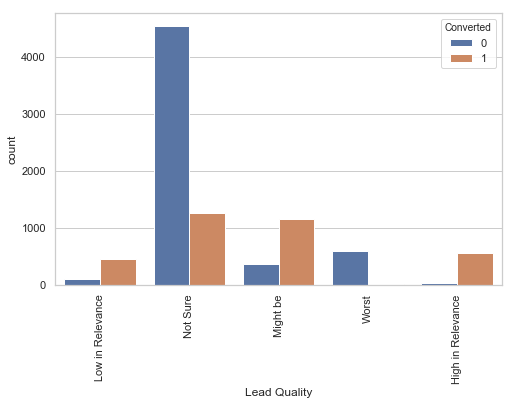

In [125]:
fig, axs = plt.subplots(figsize = (8,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = lead_data)
xticks(rotation = 90)

### Last Notable Activity  v/s Converted

In [126]:
lead_data['Last Notable Activity'].value_counts()/len(lead_data)*100,2

(Modified                        36.003967
 Email Opened                    31.110866
 SMS Sent                        23.716112
 Page Visited on Website          3.504518
 Olark Chat Conversation          2.016751
 Email Link Clicked               1.906546
 Email Bounced                    0.661230
 Unsubscribed                     0.495922
 Unreachable                      0.352656
 Had a Phone Conversation         0.154287
 Email Marked Spam                0.022041
 Resubscribed to emails           0.011020
 Form Submitted on Website        0.011020
 View in browser link Clicked     0.011020
 Approached upfront               0.011020
 Email Received                   0.011020
 Name: Last Notable Activity, dtype: float64, 2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

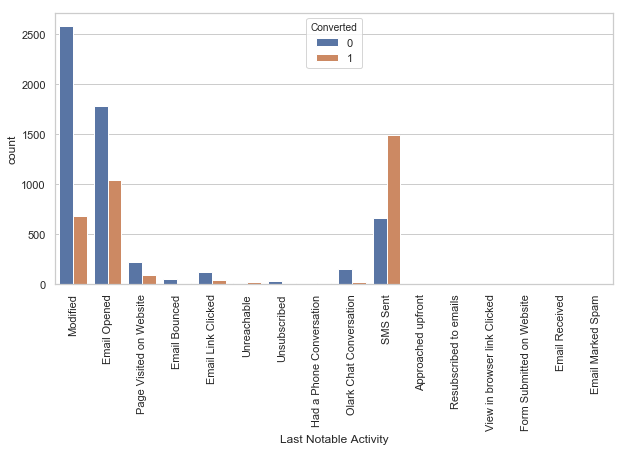

In [127]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data)
xticks(rotation = 90)

In [128]:
print("The no. of columns present in the dataset :  ", len(lead_data.columns))
print("The no. of rows present in the dataset :  ", len(lead_data))

The no. of columns present in the dataset :   13
The no. of rows present in the dataset :   9074


In [129]:
lead_data.nunique()

Lead Number                        9074
Lead Origin                           4
Lead Source                           9
Converted                             2
TotalVisits                          11
Total Time Spent on Website        1717
Page Views Per Visit                114
Last Activity                        11
Specialization                       19
What is your current occupation       6
Tags                                 13
Lead Quality                          5
Last Notable Activity                16
dtype: int64

In [130]:
### Lead Origin v/s Converted

In [131]:
lead_data.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.191867,482.887481,2.370151
std,23348.029512,0.485053,2.780618,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
5%,582840.800000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000


## 3. Treating Outliers

#### 3.1 TotalVisits

Already Done in the above step

#### 3.2 Page Views Per Visit

In [132]:
lead_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

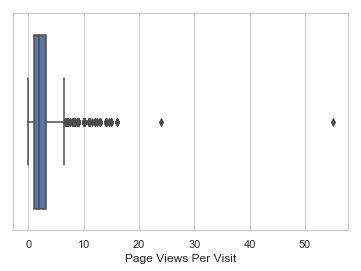

In [133]:
sns.boxplot(lead_data['Page Views Per Visit'])

### Since there are a number of outliers in the data, it makes sense to cap the outliers to 95% value for analysis.

In [134]:
percentile = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentile[0]] = percentile[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentile[1]] = percentile[1]

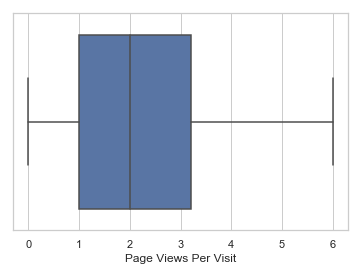

In [135]:
sns.boxplot(lead_data['Page Views Per Visit'])

### Page Views Per Visit v/s Converted

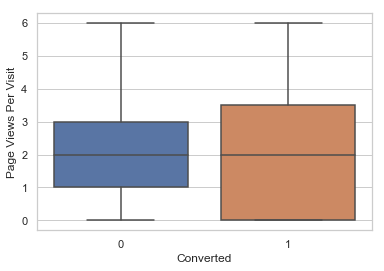

In [136]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data)

### Inference

1. Median is same for both converted and unconverted leads.

In [137]:
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Modified


In [138]:
print("The no. of columns present in the dataset :  ", len(lead_data.columns))
print("The no. of rows present in the dataset :  ", len(lead_data))

The no. of columns present in the dataset :   13
The no. of rows present in the dataset :   9074


In [139]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
Lead Number                        9074 non-null int64
Lead Origin                        9074 non-null object
Lead Source                        9074 non-null object
Converted                          9074 non-null int64
TotalVisits                        9074 non-null float64
Total Time Spent on Website        9074 non-null int64
Page Views Per Visit               9074 non-null float64
Last Activity                      9074 non-null object
Specialization                     9074 non-null object
What is your current occupation    9074 non-null object
Tags                               9074 non-null object
Lead Quality                       9074 non-null object
Last Notable Activity              9074 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 1.3+ MB


### Data Preparation

### For categorical variables:     Creating dummy features

Creating a dummy variable for some of the categorical variables and dropping the first one.

In [140]:
dummy_lead_data = pd.get_dummies(lead_data[['Lead Origin', 
                                            'Lead Source', 
                                            'Last Activity', 
                                            'Specialization',
                                            'What is your current occupation',
                                            'Tags',
                                            'Lead Quality',
                                            'Last Notable Activity']], drop_first=True)
dummy_lead_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Adding the results to the master data

In [141]:
master_lead_data = pd.concat([lead_data, dummy_lead_data], axis=1)
master_lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0

In [142]:
master_lead_data = master_lead_data.drop(['Lead Origin', 
                                          'Lead Source', 
                                          'Last Activity', 
                                          'Specialization',
                                          'What is your current occupation',
                                          'Tags',
                                          'Lead Quality',
                                          'Last Notable Activity'], axis = 1)

master_lead_data.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [143]:
master_lead_data.shape

(9074, 80)

### Splitting data into test and train

In [144]:
from sklearn.model_selection import train_test_split

##### Putting feature variable to X

In [145]:
X = master_lead_data.drop(['Lead Number','Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


##### Putting response variable to y

In [146]:
y = master_lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

##### Splitting dataframe into train and test

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

###  Feature Scaling

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                              'Total Time Spent on Website',
                                                                                                              'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


####  correlation matrix 


In [149]:
cor = master_lead_data.corr()
cor

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,1.000000,0.022830,0.048893,0.018360,0.066643,-0.069574,0.024933,0.075668,0.072834,0.140954,-0.067170,-0.018105,0.015341,0.022965,0.172330,0.003712,-0.052766,0.027213,0.104492,0.014780,0.004370,0.013295,0.011480,-0.139012,0.079658,0.001816,-0.007216,0.003865,-0.000609,-0.010054,-0.006697,0.003409,-0.010292,-0.030597,-0.008871,0.000648,-0.015664,-0.010344,0.047991,-0.010858,0.025490,-0.021197,-0.018067,-0.003818,-0.013876,-0.012154,-0.033655,0.031781,-0.014346,0.021706,-0.003109,-0.018210,0.068799,-0.005444,-0.031184,-0.044732,-0.031010,0.079892,-0.055045,-0.001831,-0.013254,0.033859,0.026640,0.028674,-0.126242,0.000832,0.015907,-0.021177,0.082276,-0.012693,0.000696,0.000355,0.073397,-0.031037,0.003162,0.006079,-0.169679,0.008124,0.001561,0.001588
Converted,0.022830,1.000000,0.050742,0.359261,0.000329,-0.037481,0.300775,-0.009328,-0.010651,0.029022,-0.124085,-0.000581,0.001325,0.255480,-0.031812,0.150027,-0.127327,-0.037746,-0.023051,-0.032183,-0.208619,0.050549,-0.080999,0.335815,-0.011625,-0.023562,0.026549,-0.001661,-0.006241,0.043580,0.029621,0.006161,0.049586,0.001674,-0.007621,0.067607,0.011600,0.044953,-0.161448,-0.008391,0.008560,-0.014207,0.020193,-0.008421,0.040372,0.018578,-0.006074,-0.281174,0.316246,0.056219,0.234789,-0.082747,-0.177428,0.171433,-0.097647,-0.104109,-0.279873,0.348355,-0.072602,-0.122980,-0.056317,0.231659,0.349936,-0.443920,-0.196901,-0.038445,-0.034043,0.019024,-0.013084,0.013451,-0.008194,0.044577,-0.263532,-0.071564,-0.033830,0.013451,0.360233,0.03

### Checking -  Lead Conversion Rate

In [150]:
converted = (sum(master_lead_data['Converted'])/len(master_lead_data['Converted'].index))*100
round(converted)

38

### It's 38% conversion rate

# Modelling

In [151]:
X_train.shape

(6351, 78)

In [152]:
X_test.shape

(2723, 78)

In [153]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6.351000e+03,6.351000e+03,6.351000e+03,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.00000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,4.153503e-17,2.774246e-16,3.950723e-17,0.535979,0.068651,0.003779,0.003936,0.320737,0.186427,0.127224,0.002677,0.051645,0.013384,0.015903,0.034640,0.028185,0.373799,0.011809,0.105338,0.005353,0.070698,0.308298,0.011022,0.006141,0.040309,0.006456,0.011967,0.104393,0.017635,0.012282,0.094316,0.040938,0.019682,0.091324,0.022359,0.054795,0.362778,0.011967,0.008818,0.003779,0.037632,0.021886,0.001102,0.001575,0.022201,0.898284,0.075894,0.019052,0.034483,0.013226,0.058259,0.01795,0.014958,0.033223,0.129586,0.591403,0.009132,0.024878,0.004881,0.058888,0.172414,0.637222,0.063140,0.007243,0



## 1. Logistic regression model

In [154]:
import statsmodels.api as sm

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           78
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.0
Date:                Wed, 10 Mar 2021   Deviance:                       2524.1
Time:                        21:47:04   Pearson chi2:                 3.51e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   22.9162   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
TotalVisits                                              0.1918      0.086      2.234      0.026       0.023       0.360
Total Time Spent on Website                              1.1451      0.063     18.049      0.000       1.021       1.269
Page Views Per Visit                                    -0.3343      0.098     -3.401      0.001      -0.527      -0.142
Lead Origin_Landing Page Submission                     -1.0004      0.220     -4.548      0.000      -1.432      -0.569
Lead Origin_Lead Add Form                               -0.3305      1.273     -0.260      0.795      -2.826       2.165
Lead Origin_Lead Import                                 29.5799   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.4737   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2358      0.152      1.548      0.122      -0.063       0.534
Lead Source_Olark Chat                                   0.8938      0.232      3.853      0.000       0.439       1.348
Lead Source_Organic Search                               0.2546      0.208      1.222      0.222      -0.154       0.663
Lead Source_Others                                       0.7283      0.794      0.917      0.359      -0.828       2.285
Lead Source_Reference                                    1.6429      1.328      1.237      0.216      -0.960       4.245
Lead Source_Referral Sites                              -0.0442      0.488     -0.091      0.928      -1.001       0.912
Lead Source_Welingak Website                             5.2807      1.469      3.594      0.000       2.401       8.160
Last Activity_Email Bounced                             -1.5432      0.770     -2.005      0.045      -3.051      -0.035
Last Activity_Email Link Clicked                         0.8418      0.644      1.307      0.191      -0.420       2.104
Last Activity_Email Opened                               0.0104      0.385      0.027      0.978      -0.744       0.764
Last Activity_Form Submitted on Website                  0.1194      0.594      0.201      0.841      -1.044       1.283
Last Activity_Olark Chat Conversation                   -0.5730      0.392     -1.461      0.144      -1.342       0.196
Last Activity_Other_Activity                             1.4618      1.200      1.219      0.223      -0.889       3.813
Last Activity_Page Visited on Website                    0.3152      0.450      0.701      0.484      -0.567       1.197
Last Activity_SMS Sent                                   1.0003      0.360      2.782      0.005       0.296       1.705
Last Activity_Un

###  Feature Selection Using RFE

In [155]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [156]:
rfe.support_

array([False,  True, False, False,  True,  True, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False])

In [157]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 31),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Others', False, 37),
 ('Lead Source_Reference', False, 59),
 ('Lead Source_Referral Sites', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Opened', False, 40),
 ('Last Activity_Form Submitted on Website', False, 43),
 ('Last Activity_Olark Chat Conversation', False, 8),
 ('Last Activity_Other_Activity', False, 3),
 ('Last Activity_Page Visited on Website', False, 38),
 ('Last Activity_SMS Sent', False, 2),
 ('Last Activity_Unreachable', False, 10),
 ('Last A

In [158]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [159]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
     

### Assessing the model with StatsModels

In [160]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1336.3
Date:                Wed, 10 Mar 2021   Deviance:                       2672.6
Time:                        21:47:07   Pearson chi2:                 2.71e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7420      0.243     -7.182      0.000      -2.217      -1.267
Total Time Spent on Website                              1.1502      0.061     18.919      0.000       1.031       1.269
Lead Origin_Lead Add Form                                2.2665      0.368      6.158      0.000       1.545       2.988
Lead Origin_Lead Import                                  1.8030      0.770      2.343      0.019       0.295       3.311
Lead Source_Olark Chat                                   1.1597      0.139      8.328      0.000       0.887       1.433
Lead Source_Welingak Website                             3.3048      0.818      4.042      0.000       1.702       4.907
Last Activity_Email Bounced                             -1.3530      0.444     -3.044      0.002      -2.224      -0.482
What is your current occupation_Working Professional     1.2561      0.322      3.906      0.000       0.626       1.886
Tags_Busy                                                3.2407      0.343      9.452      0.000       2.569       3.913
Tags_Closed by Horizzon                                  8.0027      0.793     10.086      0.000       6.448       9.558
Tags_Lost to EINS                                        8.8781      0.769     11.547      0.000       7.371      10.385
Tags_Ringing                                            -1.9653      0.354     -5.546      0.000      -2.660      -1.271
Tags_Will revert after reading the email                 3.5305      0.244     14.466      0.000       3.052       4.009
Tags_invalid number                                    -23.6149   2.23e+04     -0.001      0.999   -4.38e+04    4.37e+04
Tags_switched off                                       -2.8326      0.643     -4.402      0.000      -4.094      -1.571
Tags_wrong number given                                -23.2846   3.03e+04     -0.001      0.999   -5.93e+04    5.93e+04
Lead Quality_Not Sure                                   -3.1625      0.141    -22.465      0.000      -3.438      -2.887
Lead Quality_Worst                                      -4.0035      0.839     -4.769      0.000      -5.649      -2.358
Last Notable Activity_Modified                          -1.0150      0.120     -8.481      0.000      -1.250      -0.780
Last Notable Activity_Olark Chat Conversation           -1.6826      0.407     -4.135      0.000      -2.480      -0.885
Last Notable Activity_SMS Sent                           2.2047      0.138     16.027      0.000       1.935       2.474
========================================================================================================================
"""

In [161]:
col1 = col.drop('Tags_invalid number',1)

In [162]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1341.1
Date:                Wed, 10 Mar 2021   Deviance:                       2682.3
Time:                        21:47:07   Pearson chi2:                 2.66e+04
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8896      0.242     -7.813      0.000      -2.364      -1.416
Total Time Spent on Website                              1.1522      0.061     18.983      0.000       1.033       1.271
Lead Origin_Lead Add Form                                2.2988      0.369      6.222      0.000       1.575       3.023
Lead Origin_Lead Import                                  1.8044      0.768      2.348      0.019       0.298       3.311
Lead Source_Olark Chat                                   1.1634      0.139      8.371      0.000       0.891       1.436
Lead Source_Welingak Website                             3.2719      0.818      3.999      0.000       1.668       4.875
Last Activity_Email Bounced                             -1.3527      0.445     -3.043      0.002      -2.224      -0.481
What is your current occupation_Working Professional     1.2900      0.324      3.980      0.000       0.655       1.925
Tags_Busy                                                3.3944      0.341      9.946      0.000       2.726       4.063
Tags_Closed by Horizzon                                  8.1313      0.794     10.244      0.000       6.576       9.687
Tags_Lost to EINS                                        9.0066      0.769     11.714      0.000       7.500      10.514
Tags_Ringing                                            -1.7970      0.352     -5.112      0.000      -2.486      -1.108
Tags_Will revert after reading the email                 3.6720      0.244     15.068      0.000       3.194       4.150
Tags_switched off                                       -2.6570      0.642     -4.140      0.000      -3.915      -1.399
Tags_wrong number given                                -22.1291   1.84e+04     -0.001      0.999    -3.6e+04     3.6e+04
Lead Quality_Not Sure                                   -3.1515      0.140    -22.446      0.000      -3.427      -2.876
Lead Quality_Worst                                      -3.9396      0.845     -4.661      0.000      -5.596      -2.283
Last Notable Activity_Modified                          -1.0122      0.120     -8.453      0.000      -1.247      -0.777
Last Notable Activity_Olark Chat Conversation           -1.6886      0.407     -4.150      0.000      -2.486      -0.891
Last Notable Activity_SMS Sent                           2.1723      0.136     15.935      0.000       1.905       2.440
========================================================================================================================
"""

In [163]:
col2 = col1.drop('Tags_wrong number given',1)

In [164]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1344.0
Date:                Wed, 10 Mar 2021   Deviance:                       2688.0
Time:                        21:47:08   Pearson chi2:                 2.66e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9949      0.241     -8.284      0.000      -2.467      -1.523
Total Time Spent on Website                              1.1486      0.061     18.964      0.000       1.030       1.267
Lead Origin_Lead Add Form                                2.3134      0.371      6.236      0.000       1.586       3.040
Lead Origin_Lead Import                                  1.7467      0.750      2.328      0.020       0.276       3.217
Lead Source_Olark Chat                                   1.1620      0.139      8.367      0.000       0.890       1.434
Lead Source_Welingak Website                             3.2531      0.819      3.974      0.000       1.649       4.858
Last Activity_Email Bounced                             -1.3508      0.445     -3.039      0.002      -2.222      -0.479
What is your current occupation_Working Professional     1.3110      0.326      4.020      0.000       0.672       1.950
Tags_Busy                                                3.5046      0.340     10.322      0.000       2.839       4.170
Tags_Closed by Horizzon                                  8.2261      0.794     10.365      0.000       6.671       9.782
Tags_Lost to EINS                                        9.1010      0.768     11.843      0.000       7.595      10.607
Tags_Ringing                                            -1.6832      0.349     -4.820      0.000      -2.368      -0.999
Tags_Will revert after reading the email                 3.7773      0.242     15.583      0.000       3.302       4.252
Tags_switched off                                       -2.5402      0.640     -3.969      0.000      -3.795      -1.286
Lead Quality_Not Sure                                   -3.1510      0.140    -22.471      0.000      -3.426      -2.876
Lead Quality_Worst                                      -3.8701      0.852     -4.541      0.000      -5.540      -2.200
Last Notable Activity_Modified                          -1.0077      0.120     -8.417      0.000      -1.242      -0.773
Last Notable Activity_Olark Chat Conversation           -1.6863      0.407     -4.148      0.000      -2.483      -0.889
Last Notable Activity_SMS Sent                           2.1629      0.136     15.928      0.000       1.897       2.429
========================================================================================================================
"""

In [165]:
col3 = col2.drop('Lead Origin_Lead Import',1)

In [166]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1346.7
Date:                Wed, 10 Mar 2021   Deviance:                       2693.4
Time:                        21:47:08   Pearson chi2:                 2.67e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9727      0.240     -8.205      0.000      -2.444      -1.501
Total Time Spent on Website                              1.1351      0.060     18.876      0.000       1.017       1.253
Lead Origin_Lead Add Form                                2.2810      0.371      6.148      0.000       1.554       3.008
Lead Source_Olark Chat                                   1.1358      0.138      8.224      0.000       0.865       1.406
Lead Source_Welingak Website                             3.2589      0.819      3.980      0.000       1.654       4.864
Last Activity_Email Bounced                             -1.3588      0.444     -3.058      0.002      -2.230      -0.488
What is your current occupation_Working Professional     1.3117      0.325      4.036      0.000       0.675       1.949
Tags_Busy                                                3.5052      0.339     10.329      0.000       2.840       4.170
Tags_Closed by Horizzon                                  8.2217      0.793     10.364      0.000       6.667       9.776
Tags_Lost to EINS                                        9.0985      0.768     11.842      0.000       7.593      10.604
Tags_Ringing                                            -1.6802      0.349     -4.810      0.000      -2.365      -0.996
Tags_Will revert after reading the email                 3.7862      0.243     15.613      0.000       3.311       4.261
Tags_switched off                                       -2.5418      0.639     -3.981      0.000      -3.793      -1.290
Lead Quality_Not Sure                                   -3.1635      0.140    -22.554      0.000      -3.438      -2.889
Lead Quality_Worst                                      -3.8738      0.852     -4.548      0.000      -5.543      -2.204
Last Notable Activity_Modified                          -1.0131      0.120     -8.474      0.000      -1.247      -0.779
Last Notable Activity_Olark Chat Conversation           -1.6846      0.406     -4.154      0.000      -2.480      -0.890
Last Notable Activity_SMS Sent                           2.1543      0.136     15.888      0.000       1.889       2.420
========================================================================================================================
"""

In [167]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.177704
1012    0.118137
9226    0.000451
4750    0.935207
7987    0.994724
1281    0.993363
2880    0.087028
4971    0.936099
7536    0.992784
1248    0.003267
dtype: float64

In [168]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.77703977e-01, 1.18137315e-01, 4.51492080e-04, 9.35207433e-01,
       9.94724310e-01, 9.93362699e-01, 8.70284015e-02, 9.36098713e-01,
       9.92784400e-01, 3.26724660e-03])

In [169]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.177704,3009
1,0,0.118137,1012
2,0,0.000451,9226
3,1,0.935207,4750
4,1,0.994724,7987


In [170]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.177704,3009,0
1,0,0.118137,1012,0
2,0,0.000451,9226,0
3,1,0.935207,4750,1
4,1,0.994724,7987,1


# Overall Accuracy

In [171]:
from sklearn import metrics
acy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(acy)


0.9214296961108487


### Confusion matrix 

In [172]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print('Confusion matrix: \n' , confusion)

Confusion matrix: 
 [[3701  204]
 [ 295 2151]]


In [173]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [174]:
TP/float(TP+FN)

0.8793949304987735

In [175]:
TN/float(TN+FP)

0.9477592829705506

In [176]:
print(FP/float(TN+FP))

0.05224071702944942


In [177]:
print (TP/float(TP+FP))

0.913375796178344


In [178]:
print(TN/float(TN+ FN))

0.9261761761761762


In [179]:
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.913375796178344

In [180]:
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.8793949304987735

#### Check for the VIF values

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [182]:
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Quality_Not Sure,3.26
10,Tags_Will revert after reading the email,3.19
14,Last Notable Activity_Modified,1.86
1,Lead Origin_Lead Add Form,1.81
16,Last Notable Activity_SMS Sent,1.70
2,Lead Source_Olark Chat,1.63
9,Tags_Ringing,1.54
0,Total Time Spent on Website,1.42
3,Lead Source_Welingak Website,1.37
5,What is your current occupation_Working Profes...,1.27


Using sklearn utilities for the same

In [183]:
from sklearn.metrics import precision_score, recall_score
print('Precision Score: ', precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))
print('Recall Score: ', recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision Score:  0.913375796178344
Recall Score:  0.8793949304987735


In [184]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      1
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [185]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final['Converted_prob'])

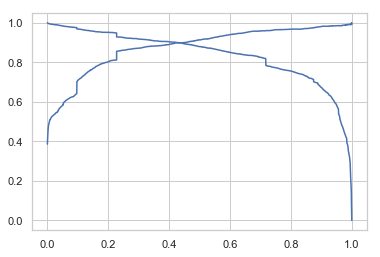

In [186]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "-")
plt.show()

### Running model on test dataset

In [187]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website',
                                                                                                            'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [188]:
X_test = X_test[col3]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
3271,-0.591008,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1490,1.894051,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
7936,-0.743117,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4216,-0.878732,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3830,-0.578179,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [189]:
X_test_sm = sm.add_constant(X_test)

In [190]:
y_test_pred = res.predict(X_test_sm)

In [191]:
y_test_pred[:]

3271    0.117022
1490    0.994909
7936    0.100326
4216    0.998528
3830    0.118535
1800    0.907695
6507    0.004536
4821    0.000705
4223    0.994787
4714    0.097537
3977    0.969870
4209    0.097537
2320    0.001256
3744    0.001203
2570    0.718827
985     0.607273
1946    0.994962
7813    0.030995
7031    0.052335
2044    0.069856
7906    0.001749
2461    0.995258
8154    0.181367
5822    0.998590
4513    0.097537
2684    0.998590
5999    0.006761
4809    0.862605
4959    0.136374
8449    0.001514
          ...   
1964    0.000479
1566    0.991070
4989    0.051033
4736    0.007120
6220    0.001164
309     0.796266
6461    0.997551
1050    0.956120
6857    0.001249
4975    0.004847
5741    0.957820
7366    0.001203
7562    0.229391
4642    0.653751
42      0.000611
250     0.001474
2815    0.045094
6073    0.165856
2336    0.229391
8874    0.054810
8926    0.000398
6448    0.137718
6299    0.921519
7852    0.719613
2258    0.331347
850     0.162991
2879    0.002674
6501    0.9968

In [192]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [193]:
y_pred_1.head()

,0
3271,0.117022
1490,0.994909
7936,0.100326
4216,0.998528
3830,0.118535


In [194]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head(20)

,Converted,Prospect ID,Converted_prob
0,0,3271,0.117022
1,1,1490,0.994909
2,0,7936,0.100326
3,1,4216,0.998528
4,0,3830,0.118535
5,1,1800,0.907695
6,0,6507,0.004536
7,0,4821,0.000705
8,1,4223,0.994787
9,0,4714,0.097537


In [195]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head(20)

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.117022,0
1,1,1490,0.994909,1
2,0,7936,0.100326,0
3,1,4216,0.998528,1
4,0,3830,0.118535,0
5,1,1800,0.907695,1
6,0,6507,0.004536,0
7,0,4821,0.000705,0
8,1,4223,0.994787,1
9,0,4714,0.097537,0


In [196]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9081894968784429

In [197]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print('Confusion matrix: \n' , confusion2)

Confusion matrix: 
 [[1579  155]
 [  95  894]]


In [198]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [199]:
sensitivity  = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('False Postive Rate: ' , FP/ float(TN+FP))
print ('True Negative Rate',TN / float(TN+ FN))

Sensitivity:  0.9039433771486349
Specificity:  0.9106113033448674
False Postive Rate:  0.08938869665513265
True Negative Rate 0.9432497013142175


In [200]:
specificity = TN / float(TN+FP)

In [201]:
pr = TP / float(TP+FP)
print('Precision Rate: ',pr)

Precision Rate:  0.8522402287893232
